In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplot3d_dragger
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 유니코드 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
matplotlib.rcParams['font.family']='NanumGothic'

# 상온 aging2

## 불량 개수

In [5]:
df_process_raw=pd.read_csv('/home/piai/바탕화면/데이터셋/bat_process.csv', encoding='euc-kr')

In [6]:
df_rta2=df_process_raw[['judge', 'rta2_box_col', 'rta2_box_row', 'rta2_box_dan']]
df_error=df_rta2[df_rta2['judge']=='불량']
df_error=df_error.groupby(['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'], as_index=False).count()
df_error.rename(columns={'judge' : 'error_count'}, inplace=True)

In [7]:
for i in range(0,335) :
    df_error['rta2_box_col'][i]=df_error['rta2_box_col'][i][0:2]
    df_error['rta2_box_row'][i]=df_error['rta2_box_row'][i][0:2]
    df_error['rta2_box_dan'][i]=df_error['rta2_box_dan'][i][0:2]
df_error = df_error.astype({'rta2_box_col' : 'int', 'rta2_box_row' : 'int', 'rta2_box_dan' : 'int'})

<IPython.core.display.Javascript object>


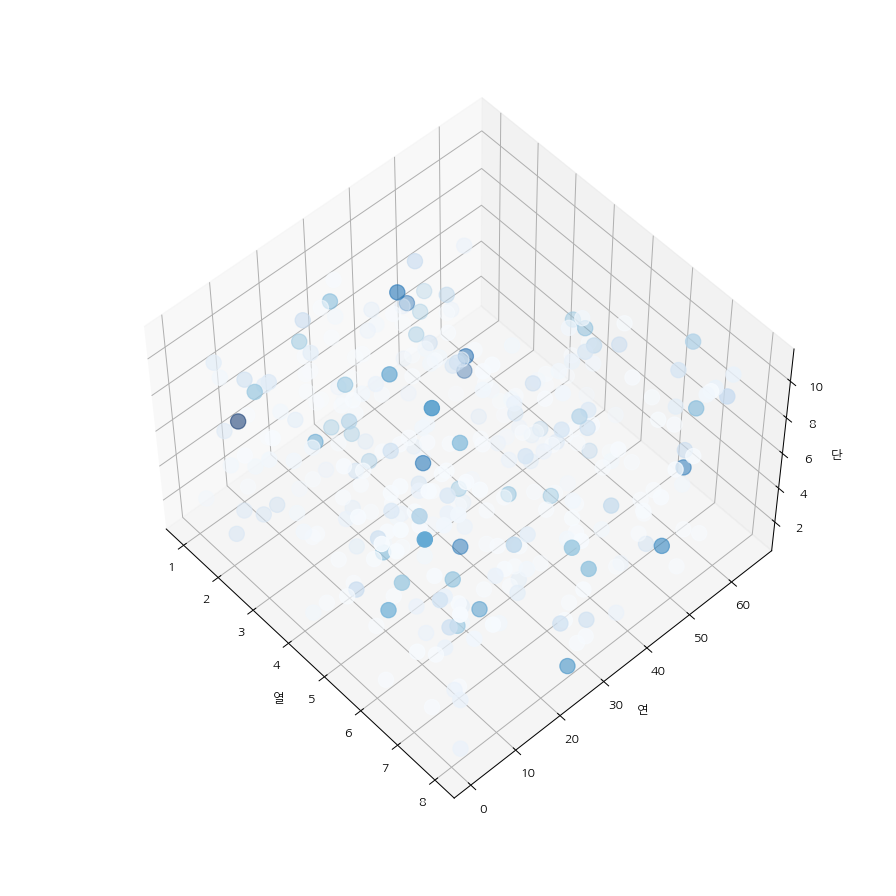

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

In [8]:
x=np.array(df_error['rta2_box_col'])
y=np.array(df_error['rta2_box_row'])
z=np.array(df_error['rta2_box_dan'])
color = np.array(df_error['error_count'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()
plt.colorbar

## 불량률

In [177]:
df_errors=df_rta2[df_rta2['judge']=='불량']
df_errors=df_errors.groupby(['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'], as_index=False).count()
df_errors.rename(columns={'judge' : 'error_count'}, inplace=True)

In [178]:
df_tot=df_rta2.groupby(['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'], as_index=False).count()
df_tot.rename(columns={'judge' : 'count'}, inplace=True)
df_rate=pd.merge(df_tot, df_errors, how='left', on=['rta2_box_col', 'rta2_box_row', 'rta2_box_dan'])
df_rate.fillna(0,inplace=True)

In [179]:
df_rate['rate']=((df_rate['error_count']/df_rate['count'])*100).round(2)
df_rate.drop(['count', 'error_count'], axis=1)

,rta2_box_col,rta2_box_row,rta2_box_dan,rate
0,01열,01연,02단,0.00
1,01열,01연,08단,0.00
2,01열,01연,10단,0.00
3,01열,02연,02단,4.17
4,01열,02연,05단,0.00
...,...,...,...,...
836,08열,61연,04단,0.00
837,08열,61연,11단,6.00
838,08열,64연,08단,0.00
839,08열,65연,01단,0.00


In [180]:
for i in range(0,len(df_rate)) :
    df_rate['rta2_box_col'][i]=df_rate['rta2_box_col'][i][0:2]
    df_rate['rta2_box_row'][i]=df_rate['rta2_box_row'][i][0:2]
    df_rate['rta2_box_dan'][i]=df_rate['rta2_box_dan'][i][0:2]
df_rate = df_rate.astype({'rta2_box_col' : 'int', 'rta2_box_row' : 'int', 'rta2_box_dan' : 'int'})

<IPython.core.display.Javascript object>


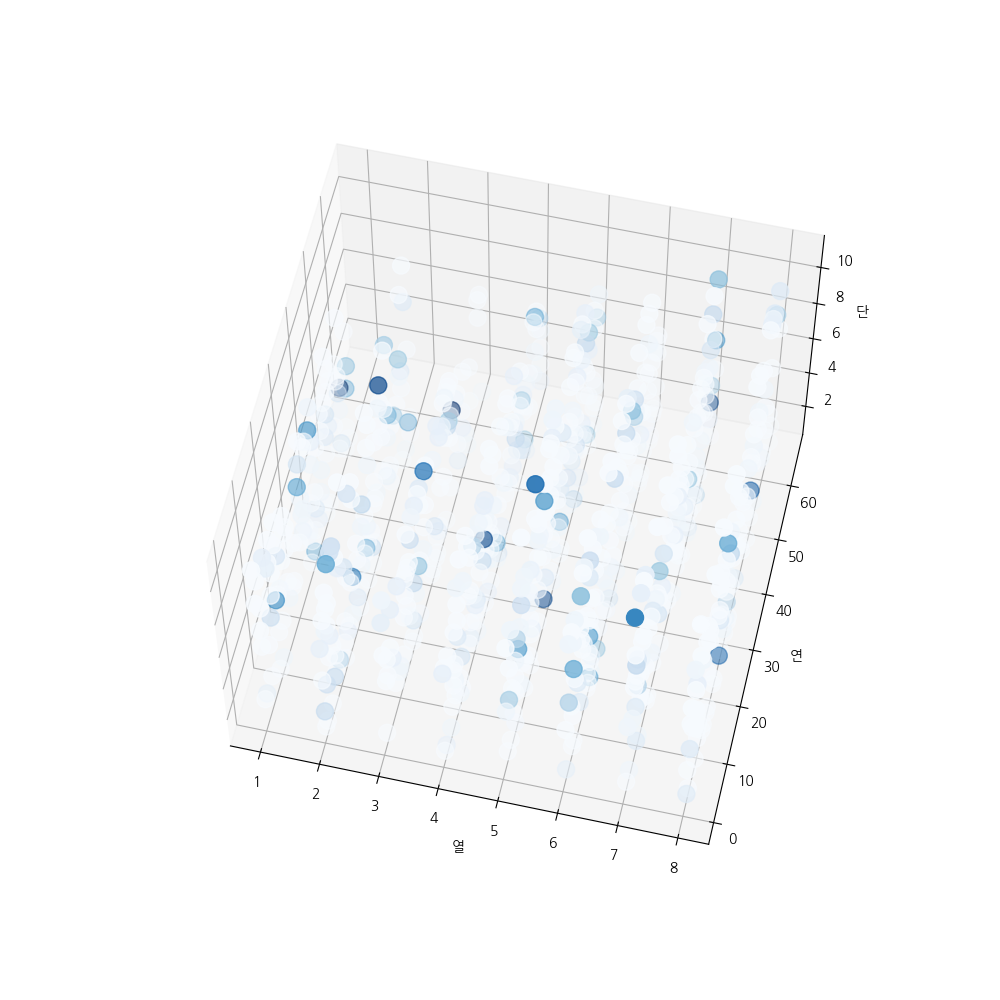

In [181]:
x=np.array(df_rate['rta2_box_col'])
y=np.array(df_rate['rta2_box_row'])
z=np.array(df_rate['rta2_box_dan'])
color = np.array(df_rate['rate'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()

# 상온 Aging 1

In [9]:
df_rta1=df_process_raw[['judge', 'rta1_box_col', 'rta1_box_row', 'rta1_box_dan']]
df_error1=df_rta1[df_rta1['judge']=='불량']
df_error1=df_error1.groupby(['rta1_box_col', 'rta1_box_row', 'rta1_box_dan'], as_index=False).count()
df_error1.rename(columns={'judge' : 'error_count'}, inplace=True)

In [10]:
for i in range(0,len(df_error1)) :
    df_error1['rta1_box_col'][i]=df_error1['rta1_box_col'][i][0:2]
    df_error1['rta1_box_row'][i]=df_error1['rta1_box_row'][i][0:2]
    df_error1['rta1_box_dan'][i]=df_error1['rta1_box_dan'][i][0:2]
df_error1 = df_error1.astype({'rta1_box_col' : 'int', 'rta1_box_row' : 'int', 'rta1_box_dan' : 'int'})

<IPython.core.display.Javascript object>


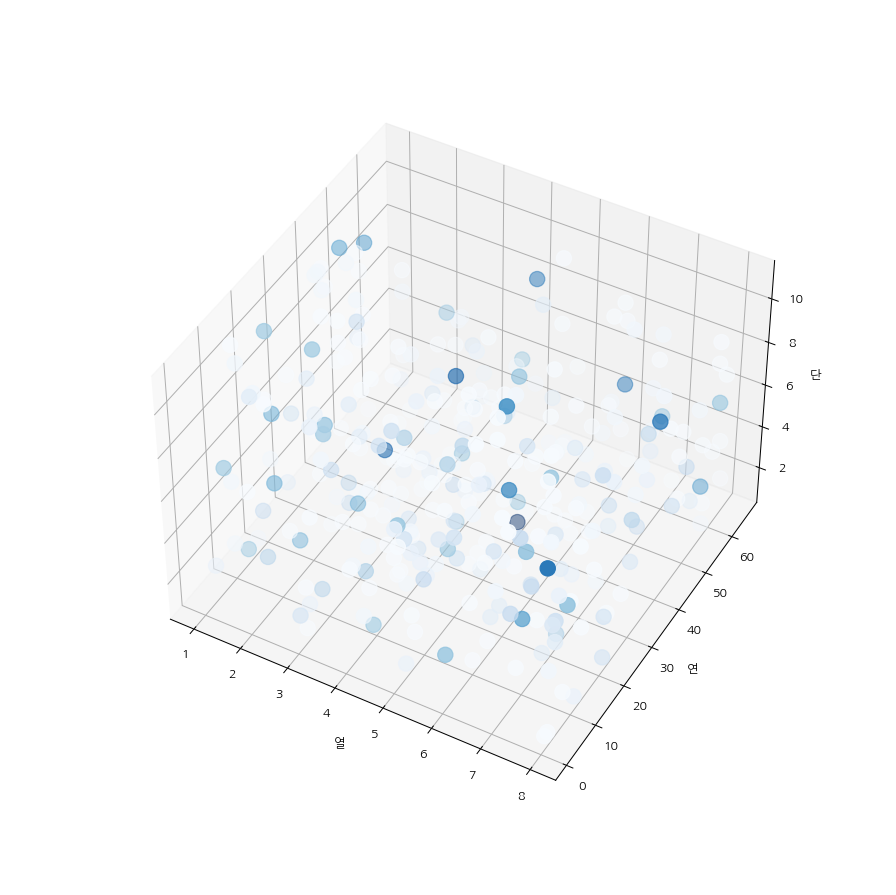

In [11]:
x=np.array(df_error1['rta1_box_col'])
y=np.array(df_error1['rta1_box_row'])
z=np.array(df_error1['rta1_box_dan'])
color = np.array(df_error1['error_count'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()

# 고온 Aging

In [12]:
df_hta=df_process_raw[['judge', 'hta1_box_col', 'hta1_box_row', 'hta1_box_dan']]
df_error2=df_hta[df_hta['judge']=='불량']
df_error2=df_error2.groupby(['hta1_box_col', 'hta1_box_row', 'hta1_box_dan'], as_index=False).count()
df_error2.rename(columns={'judge' : 'error_count'}, inplace=True)

In [13]:
for i in range(0,len(df_error2)) :
    df_error2['hta1_box_col'][i]=df_error2['hta1_box_col'][i][0:2]
    df_error2['hta1_box_row'][i]=df_error2['hta1_box_row'][i][0:2]
    df_error2['hta1_box_dan'][i]=df_error2['hta1_box_dan'][i][0:2]
df_error2 = df_error2.astype({'hta1_box_col' : 'int', 'hta1_box_row' : 'int', 'hta1_box_dan' : 'int'})

<IPython.core.display.Javascript object>


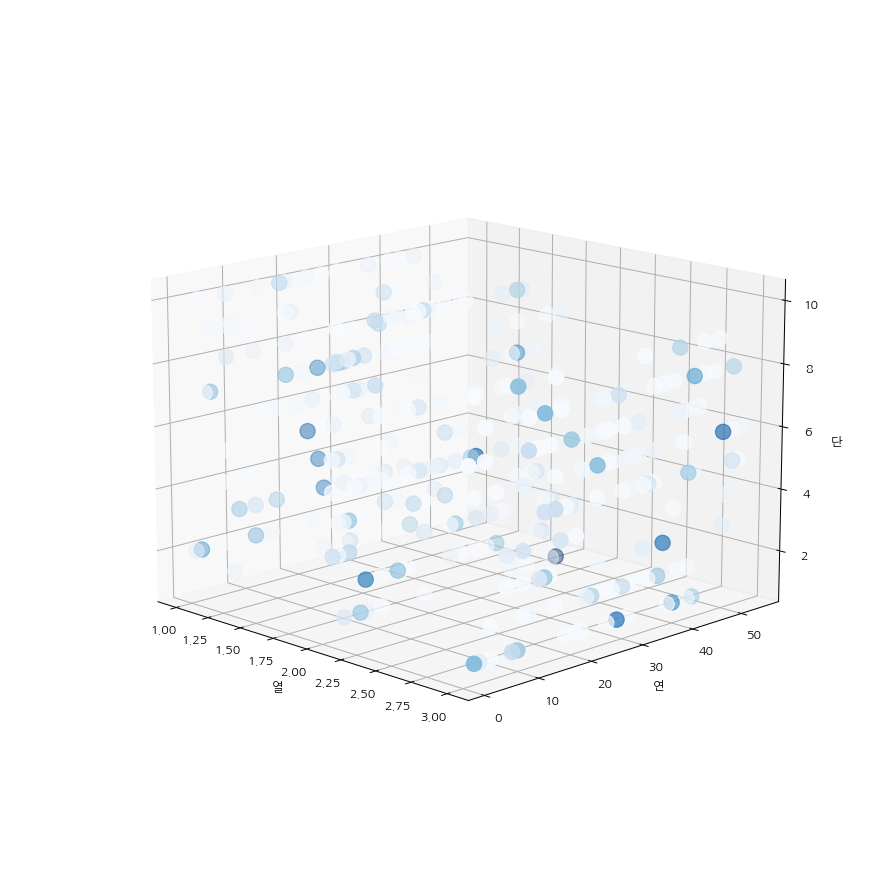

In [14]:
x=np.array(df_error2['hta1_box_col'])
y=np.array(df_error2['hta1_box_row'])
z=np.array(df_error2['hta1_box_dan'])
color = np.array(df_error2['error_count'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()

# 출하 aging1

In [203]:
df_sa1=df_process_raw[['judge', 'sa1_box_col', 'sa1_box_row', 'sa1_box_dan']]
df_error3=df_sa1[df_sa1['judge']=='불량']
df_error3=df_error3.groupby(['sa1_box_col', 'sa1_box_row', 'sa1_box_dan'], as_index=False).count()
df_error3.rename(columns={'judge' : 'error_count'}, inplace=True)

In [204]:
for i in range(0,len(df_error3)) :
    df_error3['sa1_box_col'][i]=df_error3['sa1_box_col'][i][0:2]
    df_error3['sa1_box_row'][i]=df_error3['sa1_box_row'][i][0:2]
    df_error3['sa1_box_dan'][i]=df_error3['sa1_box_dan'][i][0:2]
df_error3 = df_error3.astype({'sa1_box_col' : 'int', 'sa1_box_row' : 'int', 'sa1_box_dan' : 'int'})

<IPython.core.display.Javascript object>


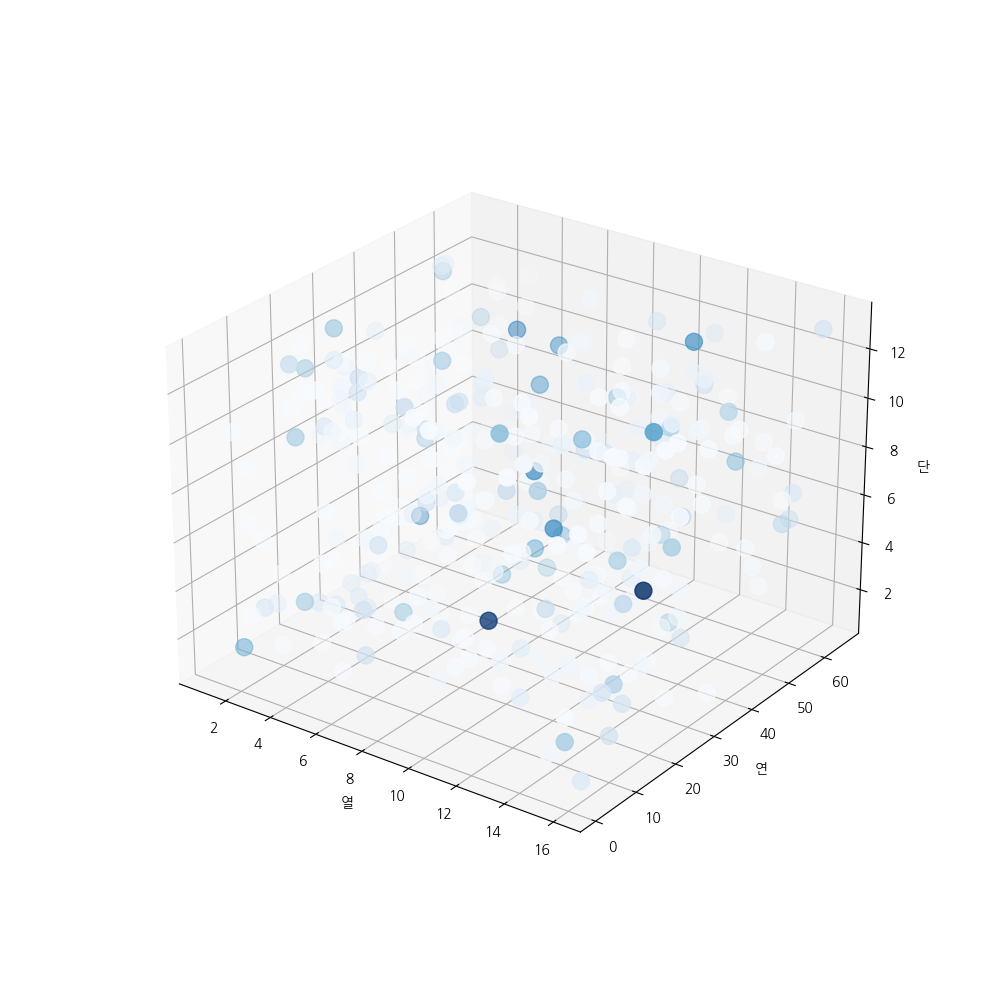

In [205]:
x=np.array(df_error3['sa1_box_col'])
y=np.array(df_error3['sa1_box_row'])
z=np.array(df_error3['sa1_box_dan'])
color = np.array(df_error3['error_count'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()

# 출하 Aging2

In [206]:
df_sa2=df_process_raw[['judge', 'sa2_box_col', 'sa2_box_row', 'sa2_box_dan']]
df_error4=df_sa2[df_sa2['judge']=='불량']
df_error4=df_error4.groupby(['sa2_box_col', 'sa2_box_row', 'sa2_box_dan'], as_index=False).count()
df_error4.rename(columns={'judge' : 'error_count'}, inplace=True)

In [207]:
for i in range(0,len(df_error4)) :
    df_error4['sa2_box_col'][i]=df_error4['sa2_box_col'][i][0:2]
    df_error4['sa2_box_row'][i]=df_error4['sa2_box_row'][i][0:2]
    df_error4['sa2_box_dan'][i]=df_error4['sa2_box_dan'][i][0:2]
df_error4 = df_error4.astype({'sa2_box_col' : 'int', 'sa2_box_row' : 'int', 'sa2_box_dan' : 'int'})

<IPython.core.display.Javascript object>


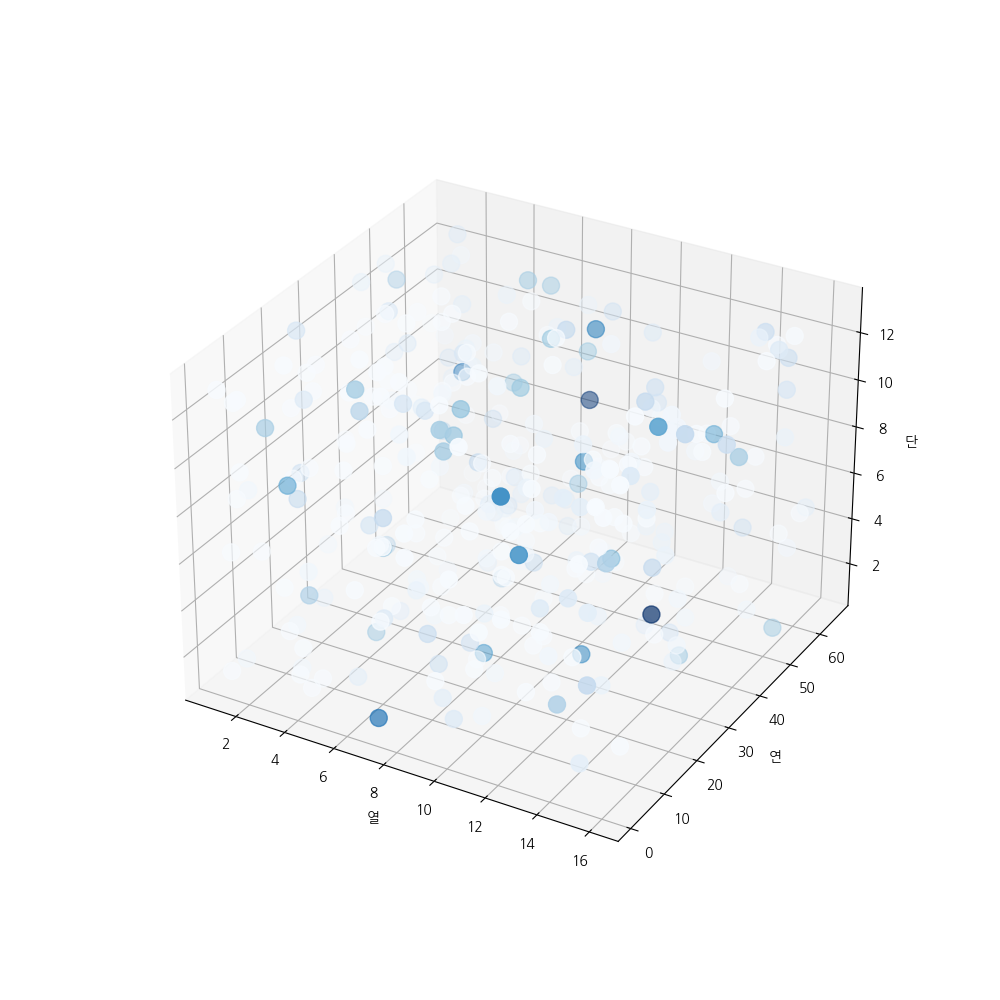

In [209]:
x=np.array(df_error4['sa2_box_col'])
y=np.array(df_error4['sa2_box_row'])
z=np.array(df_error4['sa2_box_dan'])
color = np.array(df_error4['error_count'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()

# 출하 aging 3

In [210]:
df_sa3=df_process_raw[['judge', 'sa3_box_col', 'sa3_box_row', 'sa3_box_dan']]
df_error5=df_sa3[df_sa3['judge']=='불량']
df_error5=df_error5.groupby(['sa3_box_col', 'sa3_box_row', 'sa3_box_dan'], as_index=False).count()
df_error5.rename(columns={'judge' : 'error_count'}, inplace=True)

In [211]:
for i in range(0,len(df_error5)) :
    df_error5['sa3_box_col'][i]=df_error5['sa3_box_col'][i][0:2]
    df_error5['sa3_box_row'][i]=df_error5['sa3_box_row'][i][0:2]
    df_error5['sa3_box_dan'][i]=df_error5['sa3_box_dan'][i][0:2]
df_error5 = df_error5.astype({'sa3_box_col' : 'int', 'sa3_box_row' : 'int', 'sa3_box_dan' : 'int'})

<IPython.core.display.Javascript object>


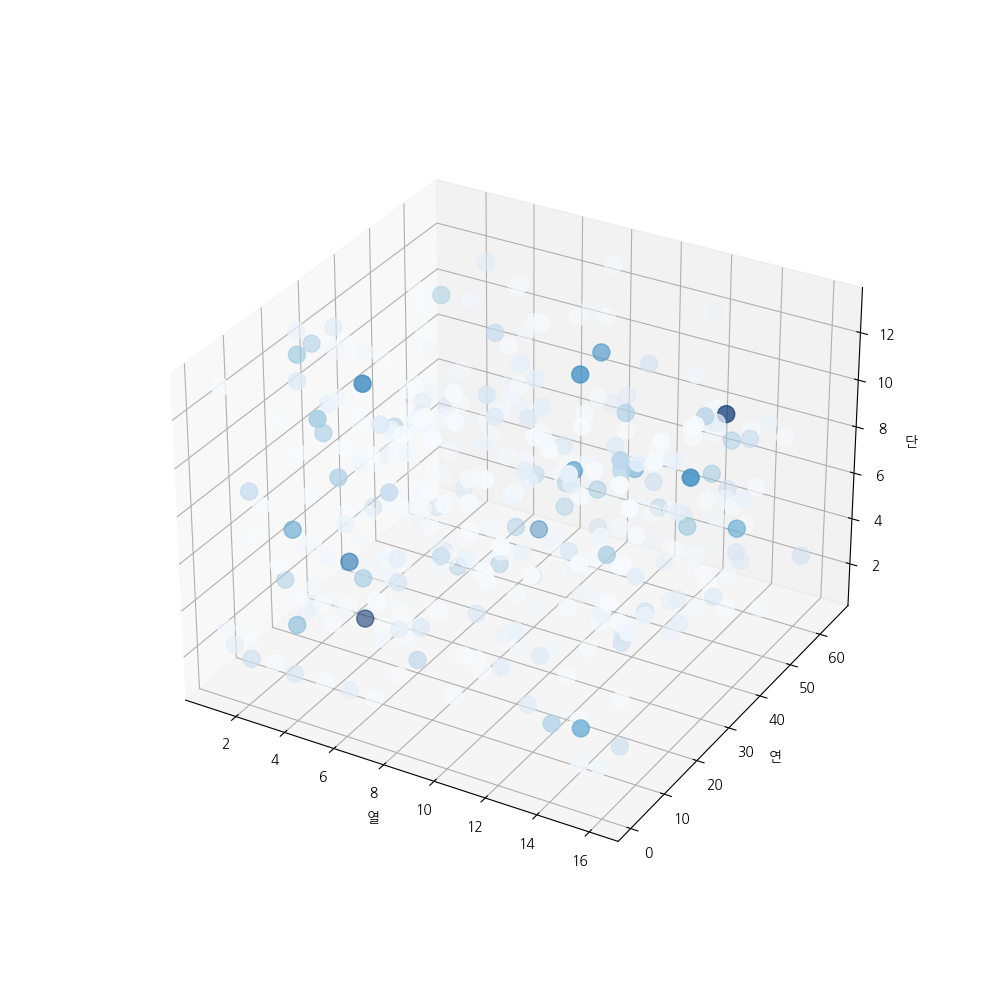

In [212]:
x=np.array(df_error5['sa3_box_col'])
y=np.array(df_error5['sa3_box_row'])
z=np.array(df_error5['sa3_box_dan'])
color = np.array(df_error5['error_count'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, marker='o',  s=150, cmap='Blues')
ax.set_xlabel('열')
ax.set_ylabel('연')
ax.set_zlabel('단')
plt.show()